In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio

#### Create a Hillshade from a Digital Elevation Model (DEM)

**Hillshade**: 3D representation of a surface generally rendered in greyscale and applied to a terrain model.  

Hillshades are often used as an underlay in a map and help make the data appear 3-dimensional and more visually interesting.



#### Plot the elevation

Extracted output to /home/studio-lab-user/earth-analytics/data/vignette-elevation/.


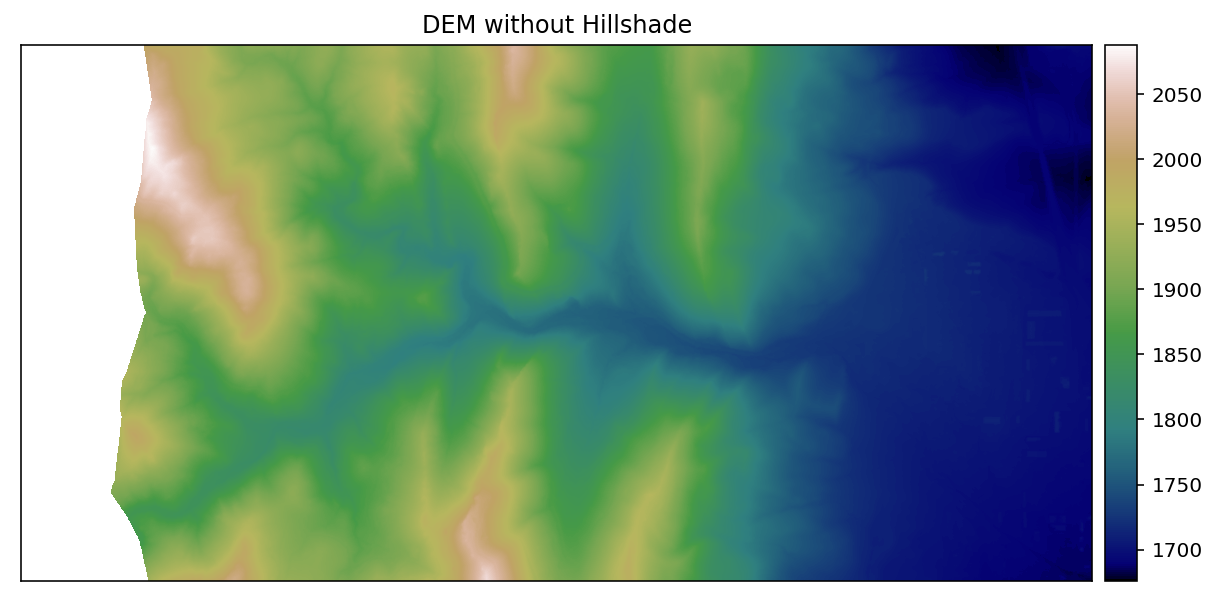

In [3]:
data = et.data.get_data("vignette-elevation")

dtm = "./earth-analytics/data/vignette-elevation/pre_DTM.tif"

# Open the DEM with Rasterio
with rio.open(dtm) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="DEM without Hillshade",
    figsize=(10, 6),
)
plt.show()

#### Plot the hillshade

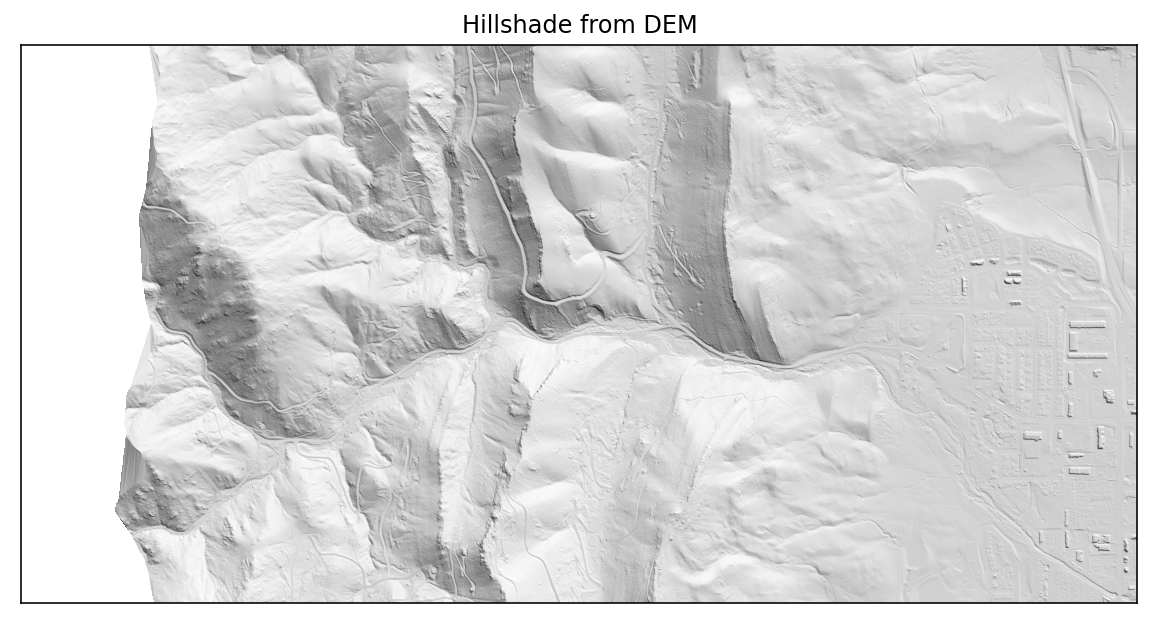

In [4]:
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade from DEM",
    figsize=(10, 6),
)
plt.show()

#### Overlay a DEM on top of the Hillshade

Combine the DEM and hillshade to visually enhance the Digital Elevation Model (DEM).

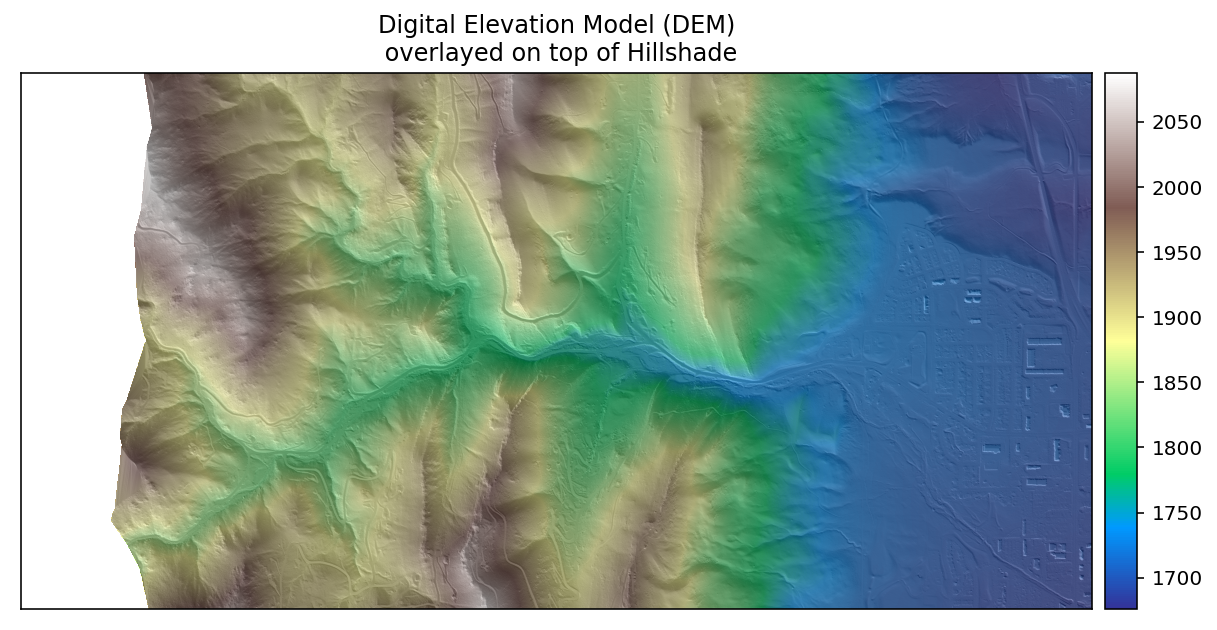

In [5]:
# Plot the DEM and hillshade at the same time
# sphinx_gallery_thumbnail_number = 5
fig, ax = plt.subplots(figsize=(10, 6))
ep.plot_bands(
    elevation,
    ax=ax,
    cmap="terrain",
    title="Digital Elevation Model (DEM)\n overlayed on top of Hillshade",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5)
plt.show()

In [6]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

#### Create a Pandas DataFrame

In [7]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

#### Convert to a GeoPandas DataFrame

In [8]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


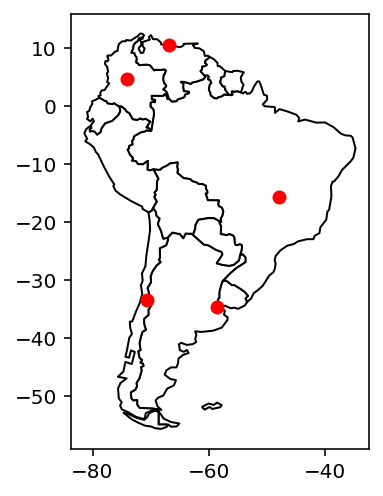

In [9]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()